In [134]:
import numpy as np

# Problem parameters
MAX_OFFER = 10
MAINTENANCE_COST = 0.1
OFFER_PROBABILITIES = [0.0, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.3, 0.1]
NUM_OFFERS = len(OFFER_PROBABILITIES)
gamma = 0.5


In [135]:
def simulate_episode_trajectory(policy):
    state = 0
    trajectory = []

    while True:
        action = np.random.choice(2, p=policy[state])
        if action == 1:  # Stop
            reward = -state
            trajectory.append((state, action, reward))
            break
        else:  # Continue
            offer = np.random.choice(range(NUM_OFFERS), p=OFFER_PROBABILITIES)
            next_state = max(state, offer)
            reward = MAINTENANCE_COST  # Make maintenance cost negative
            trajectory.append((state, action, reward))
            state = next_state

    return trajectory

def calculate_Q(policy, num_episodes=1000):
    Q = np.zeros((MAX_OFFER + 1, 2))
    N = np.zeros((MAX_OFFER + 1, 2))

    for _ in range(num_episodes):
        trajectory = simulate_episode_trajectory(policy)
        G = 0
        for state, action, reward in reversed(trajectory):
            G = reward + gamma*G  # No discount factor in this problem
            N[state, action] += 1
            Q[state, action] += (G - Q[state, action]) / N[state, action]

    return Q


def evaluate_policy(policy, num_episodes=1000):
    total_reward = 0

    for _ in range(num_episodes):
        state = 0
        episode_reward = 0
        while True:
            if policy[state] == 1:  # Stop
                episode_reward -= state
                break
            else:  # Continue
                offer = np.random.choice(range(NUM_OFFERS), p=OFFER_PROBABILITIES)
                next_state = max(state, offer)
                episode_reward += MAINTENANCE_COST
                state = next_state
        total_reward += episode_reward

    return total_reward / num_episodes


In [136]:
def npg_algorithm(n, K):
    pi = np.ones((MAX_OFFER + 1, 2)) / 2  # Uniform initial policy
    pi_history = np.zeros((K, MAX_OFFER + 1, 2))

    for i in range(K):
        # print(f"Iteration {i+1}/{K}", end=' ')
        Q = calculate_Q(pi)
        # print(f"Q matrix: {Q}")
        
        for s in range(MAX_OFFER + 1):
            exp_n_Q = np.exp(n * -Q[s])
            pi[s] = pi[s] * exp_n_Q / np.sum(pi[s] * exp_n_Q)
        
        # print("Policy:", pi)  # Print only the probability of stopping
        pi_history[i] = pi


    return pi, pi_history

In [137]:
n = np.log(2)  # Constant Step size
K = 100  # Number of iterations

# Run the algorithm
final_policy, all_iter_policy = npg_algorithm(n, K)
deterministic_policy = np.argmax(final_policy, axis=1)

# Print the learned policy
print("\nFinal Policy (probability of stopping):", final_policy[:, 1])
print("Deterministic Policy:", deterministic_policy)

# Evaluate the learned policy
average_reward = evaluate_policy(deterministic_policy)
print(f"\nAverage Reward: {average_reward}")


Final Policy (probability of stopping): [2.59964744e-92 1.95952749e-91 2.96312555e-87 1.62028007e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00]
Deterministic Policy: [0 0 0 0 1 1 1 1 1 1 1]

Average Reward: -7.586899999999931


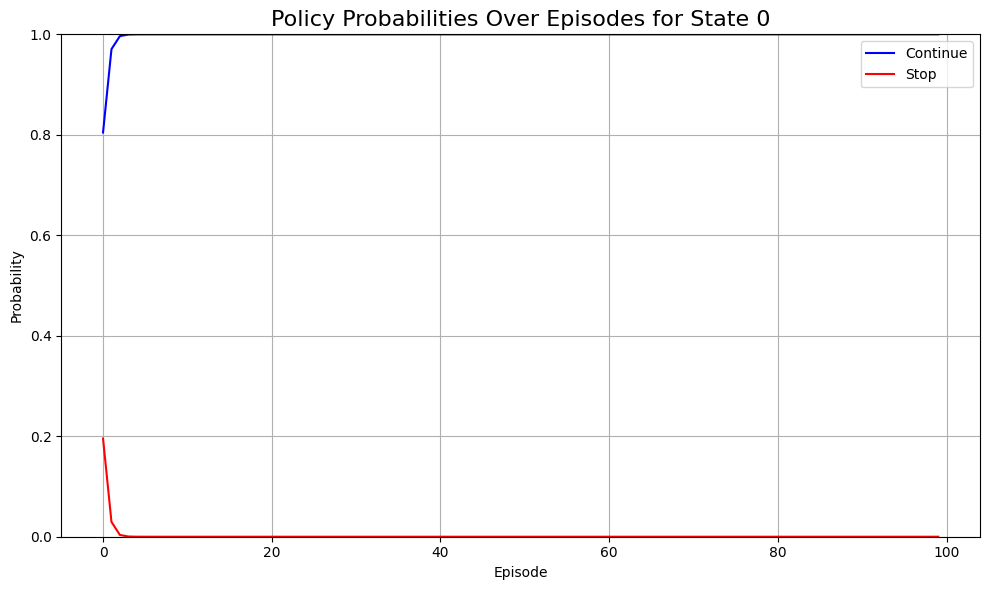

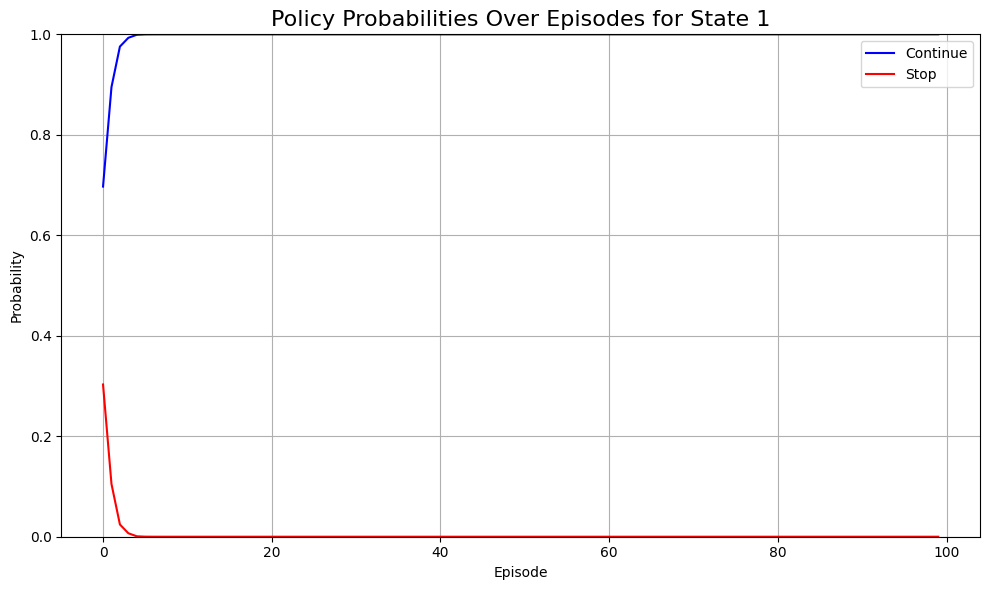

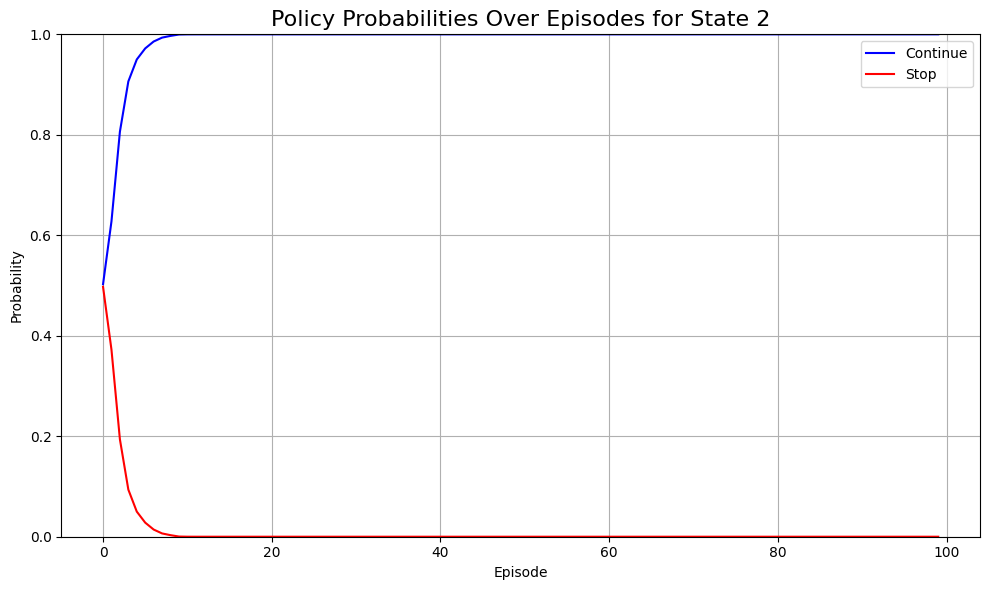

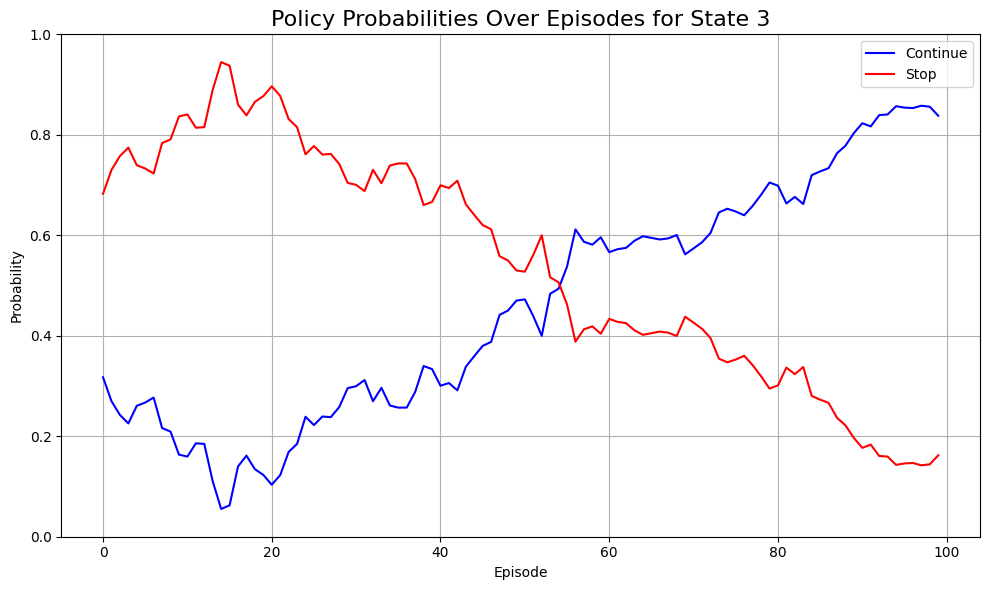

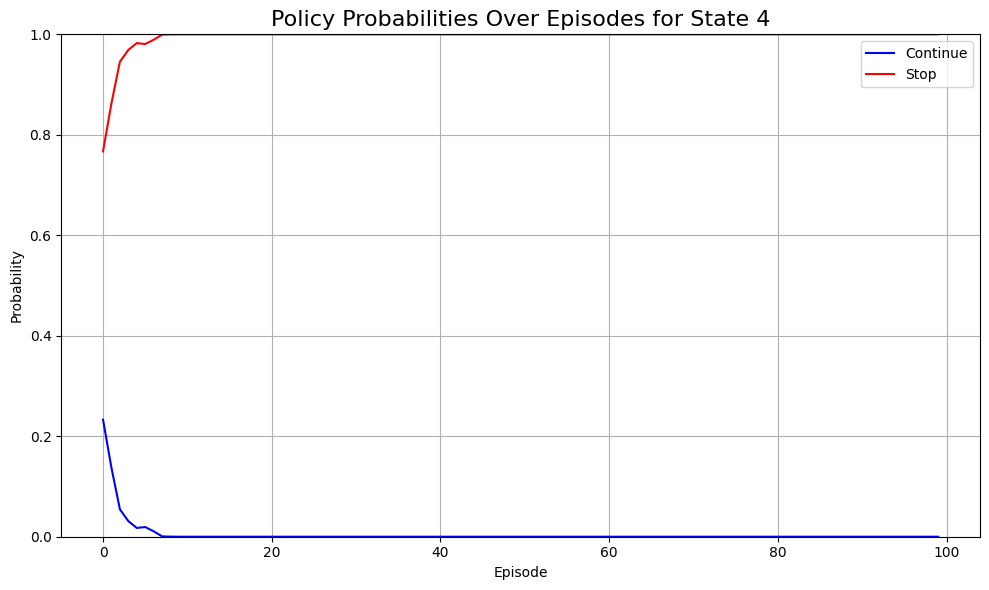

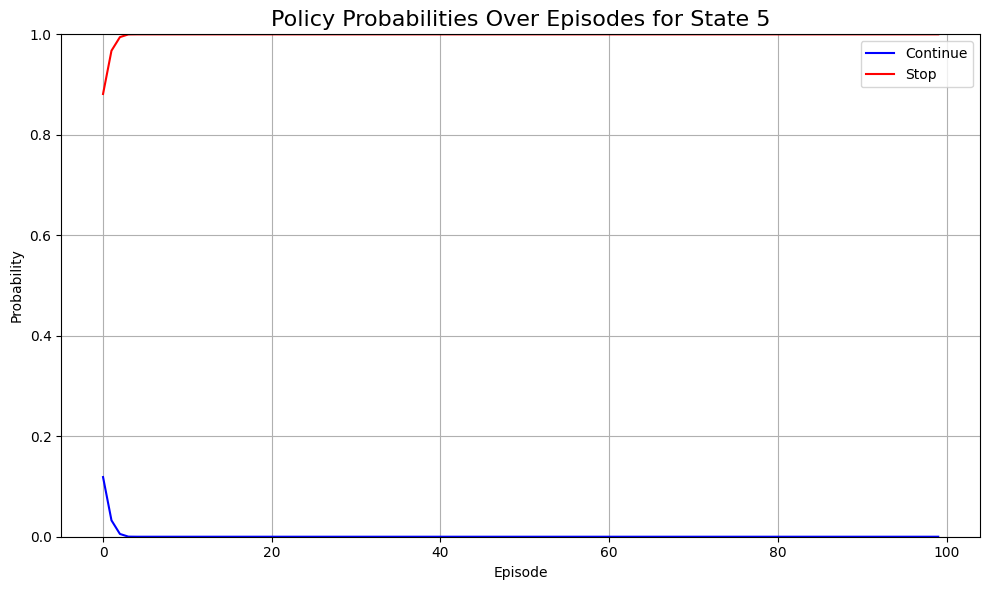

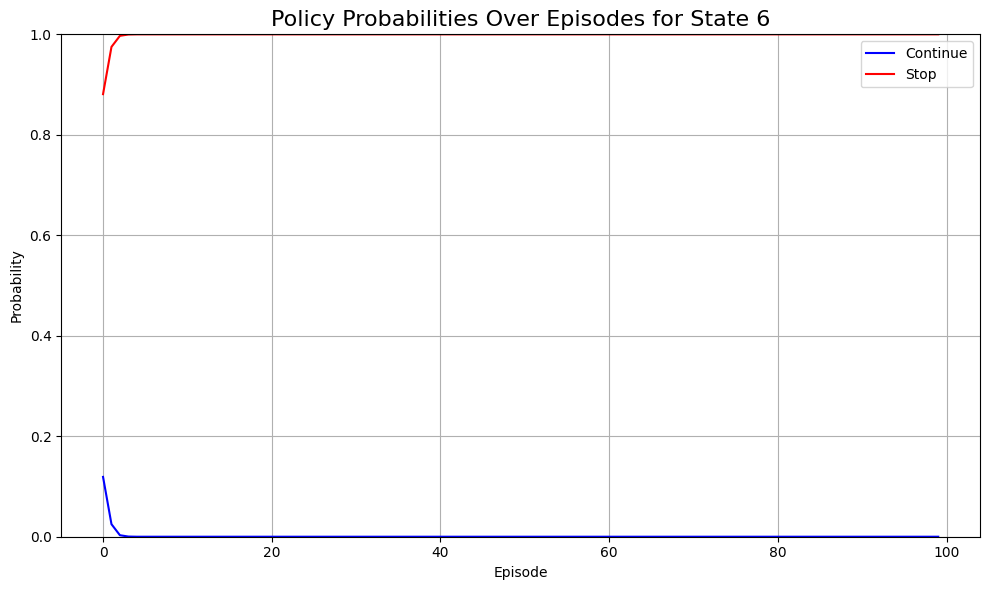

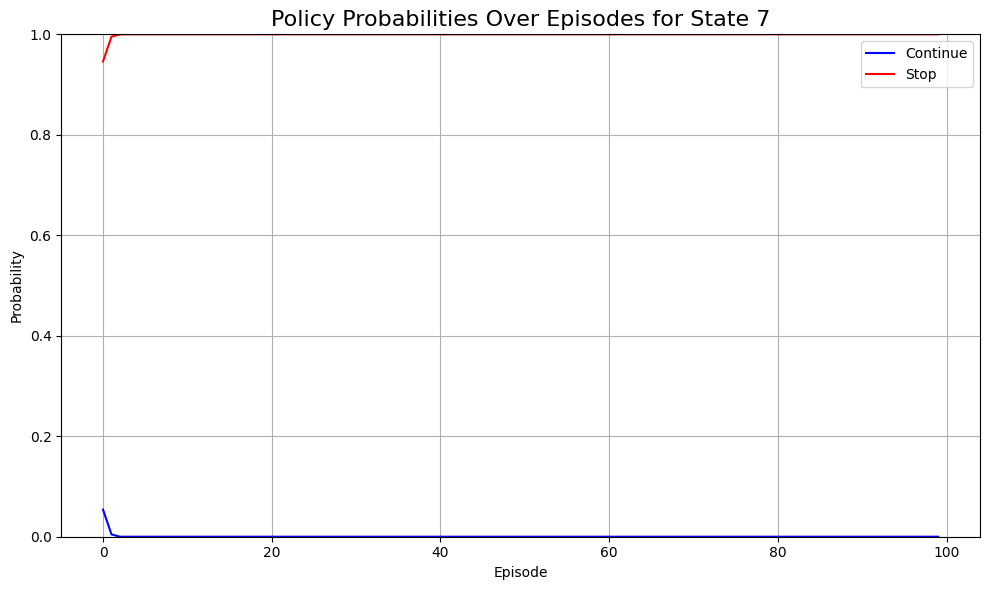

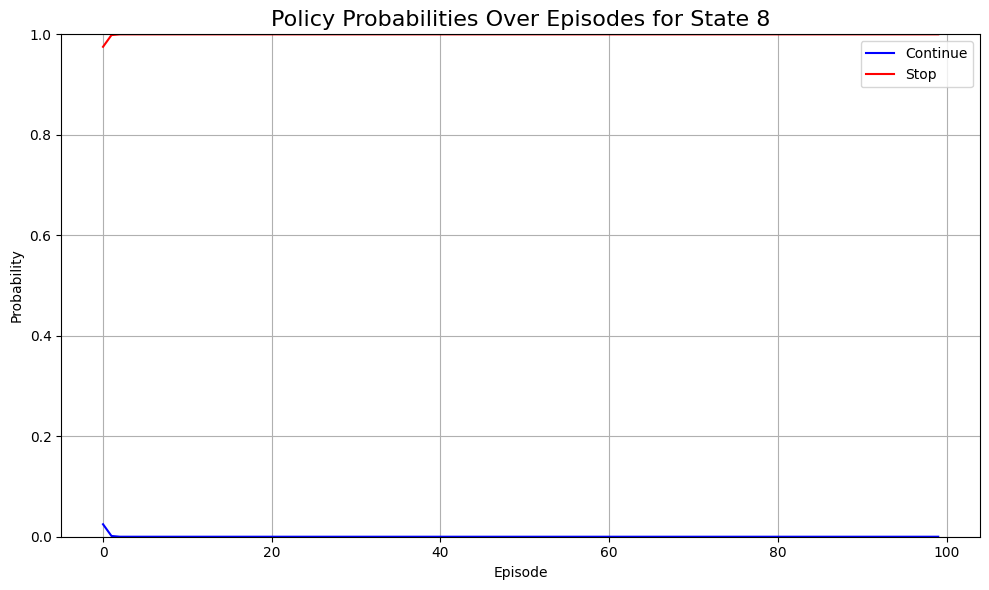

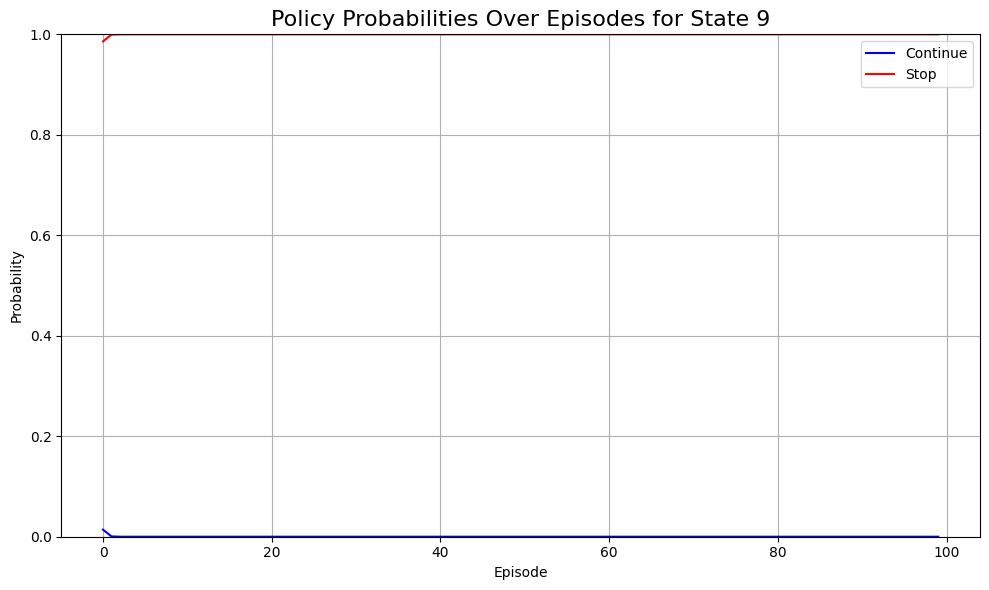

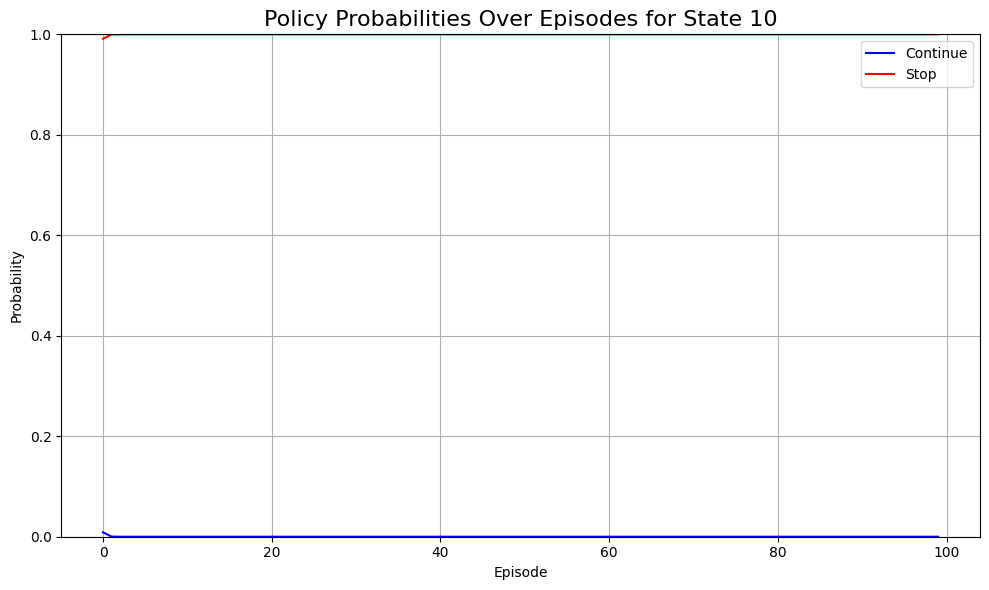

In [138]:
import matplotlib.pyplot as plt 

for state in range(MAX_OFFER + 1):
    plt.figure(figsize=(10, 6))
    plt.plot(range(K), all_iter_policy[:, state, 0], label='Continue', color='blue')
    plt.plot(range(K), all_iter_policy[:, state, 1], label='Stop', color='red')
    
    plt.title(f'Policy Probabilities Over Episodes for State {state}', fontsize=16)
    plt.xlabel('Episode')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()



Final Policy (probability of stopping): [1.27253964e-09 4.98620927e-08 5.27862306e-04 4.63934106e-01
 9.99999800e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00]
Deterministic Policy: [0 0 0 0 1 1 1 1 1 1 1]

Average Reward: -7.3957999999999195


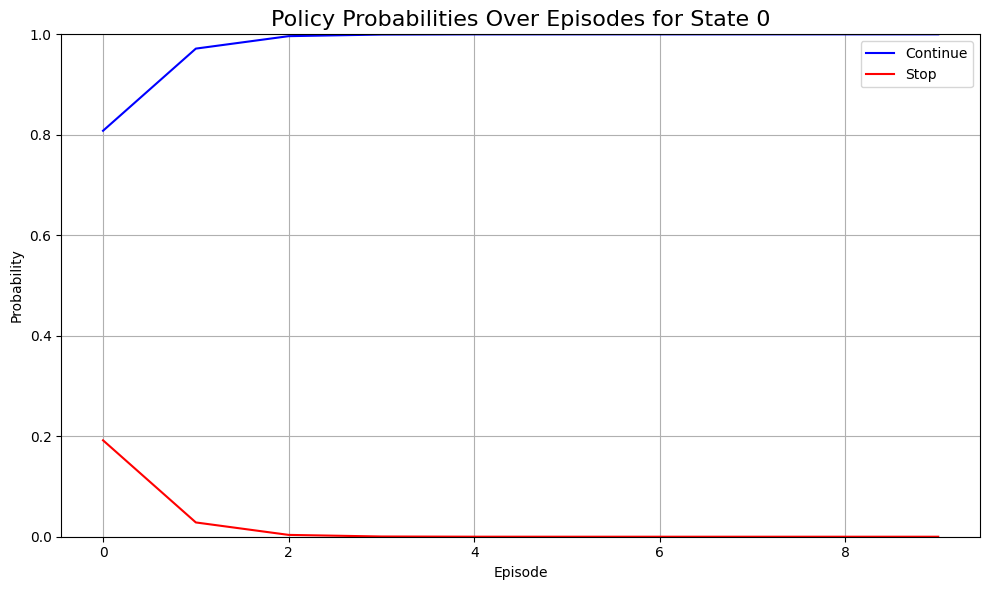

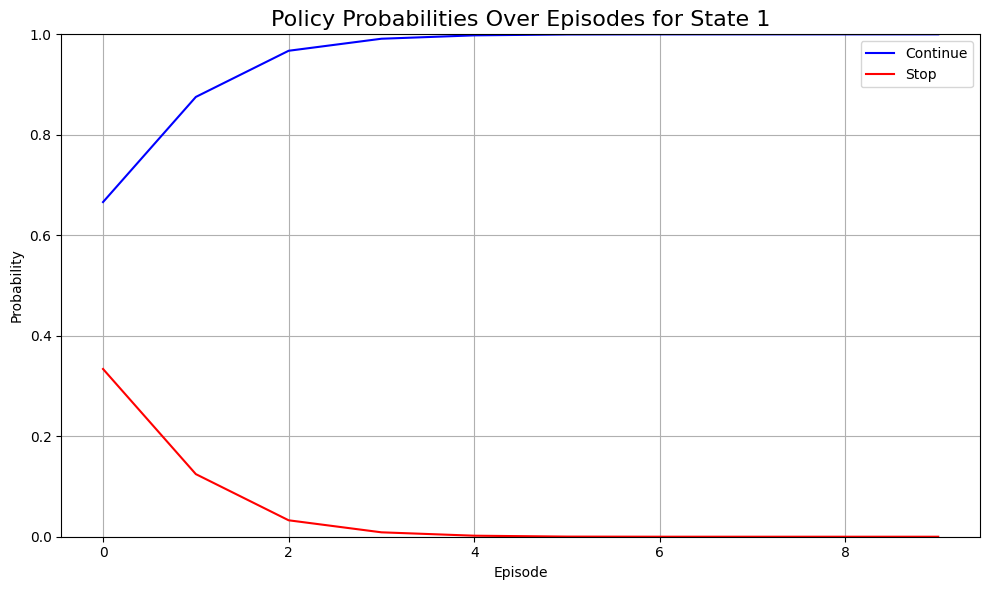

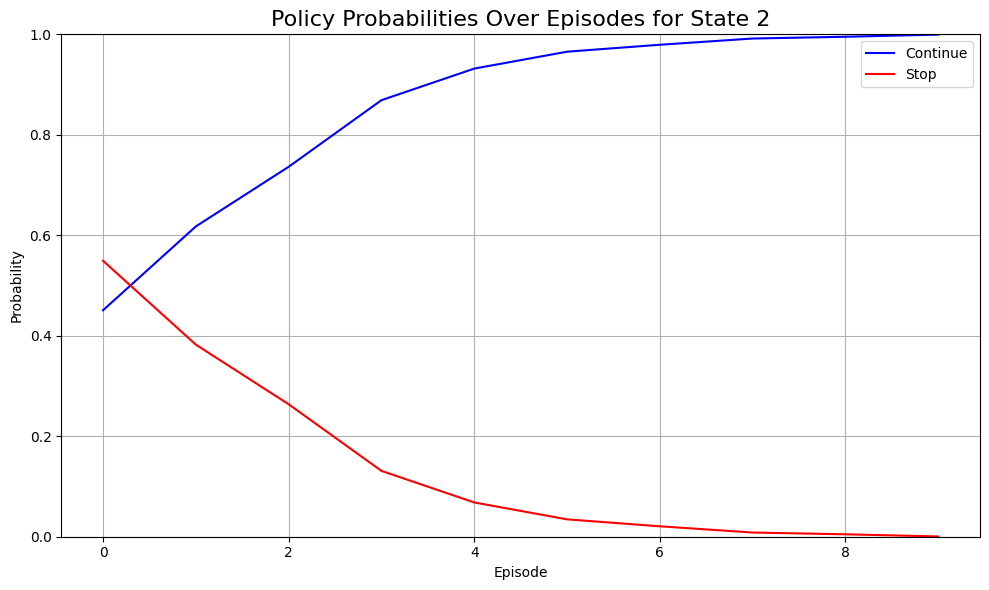

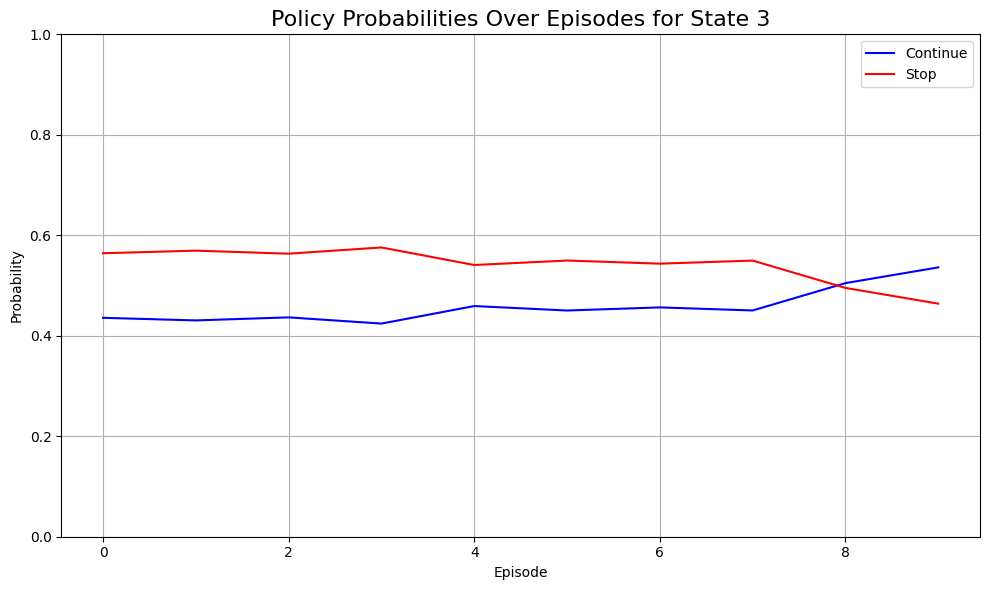

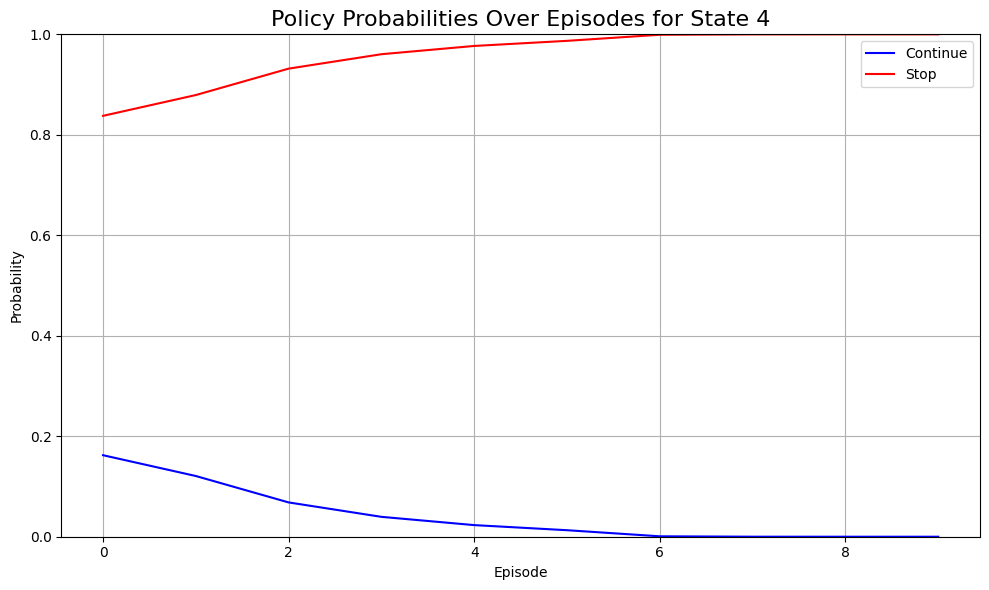

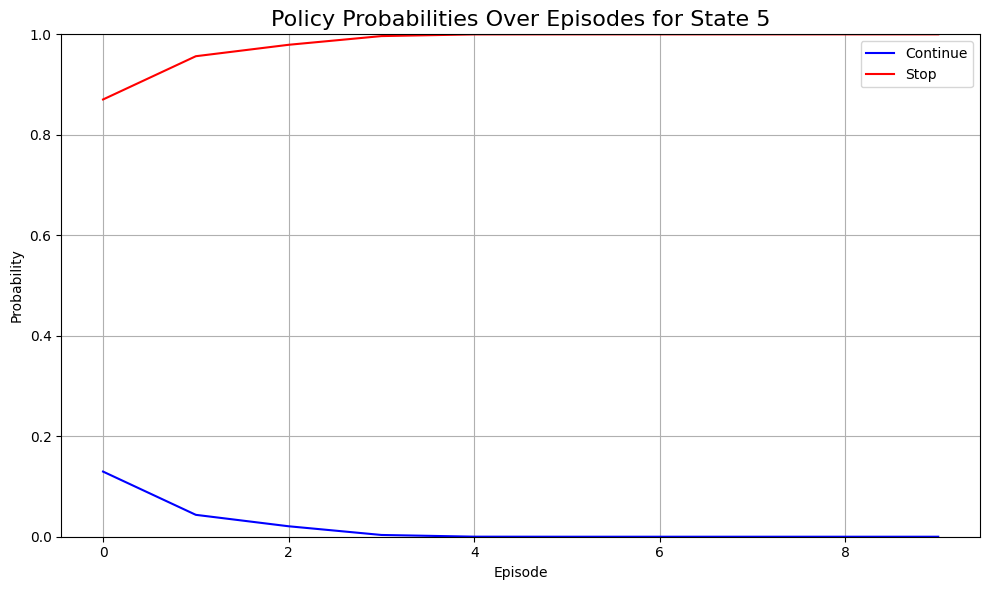

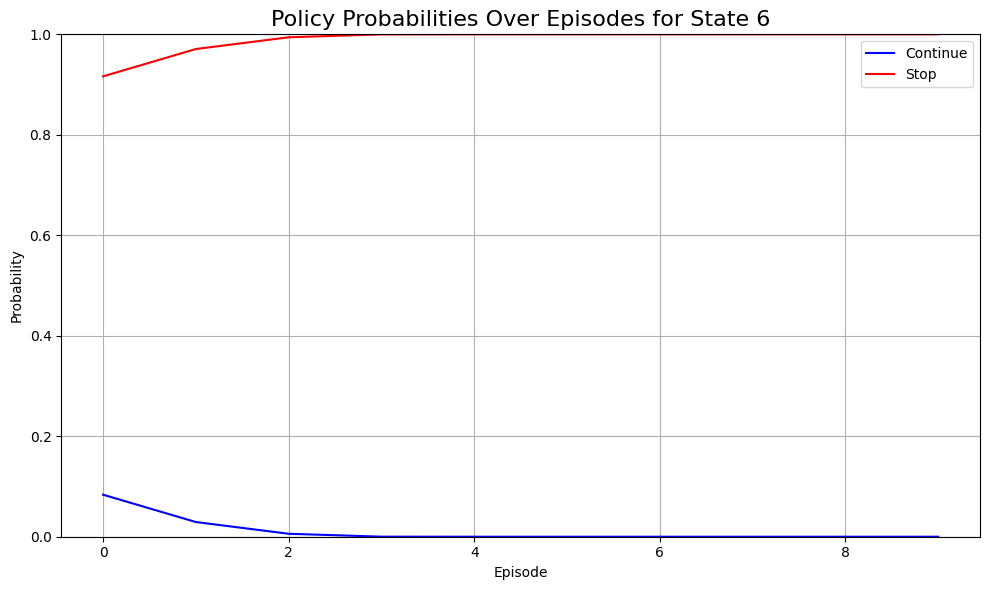

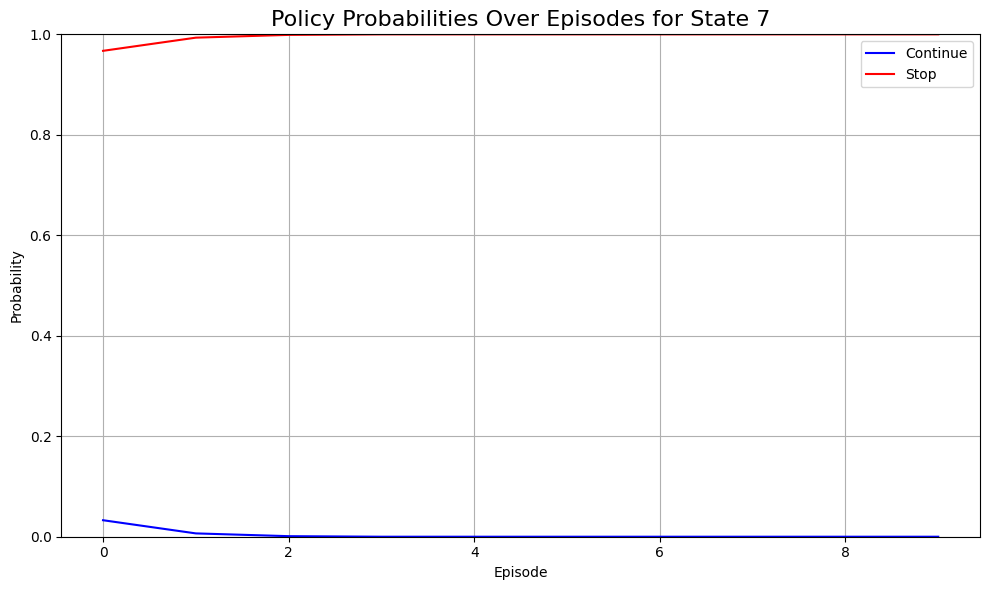

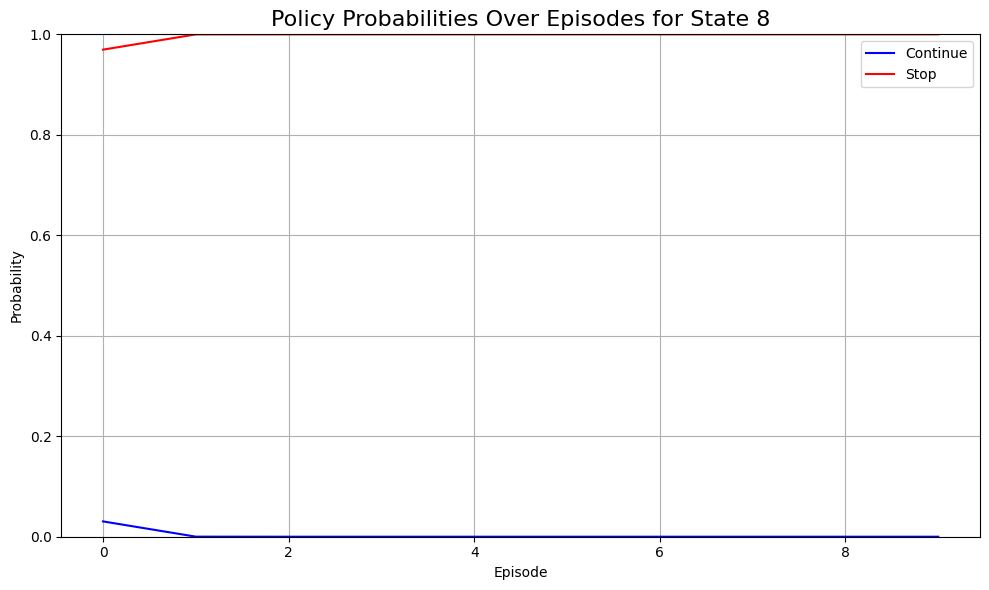

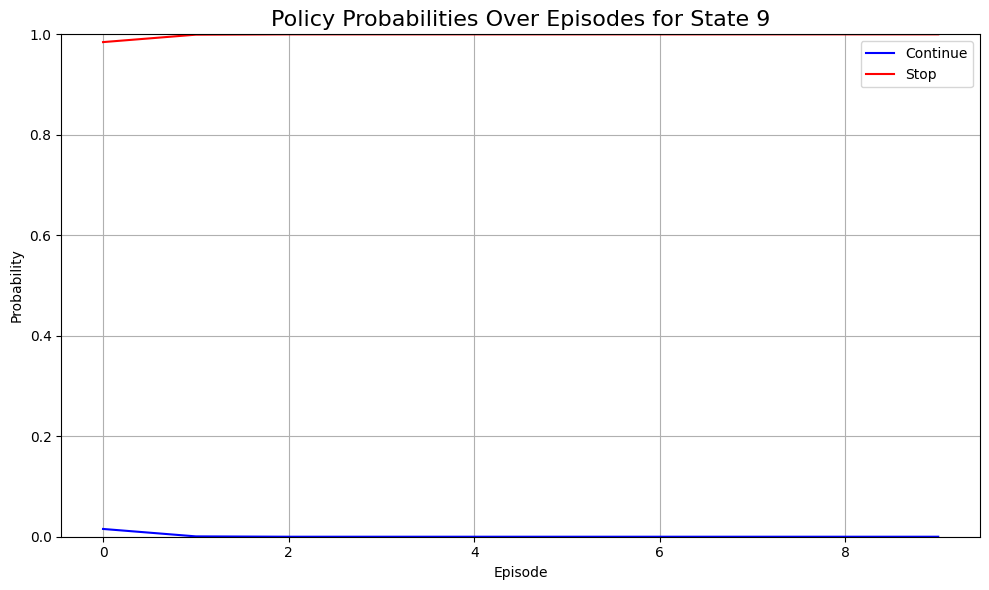

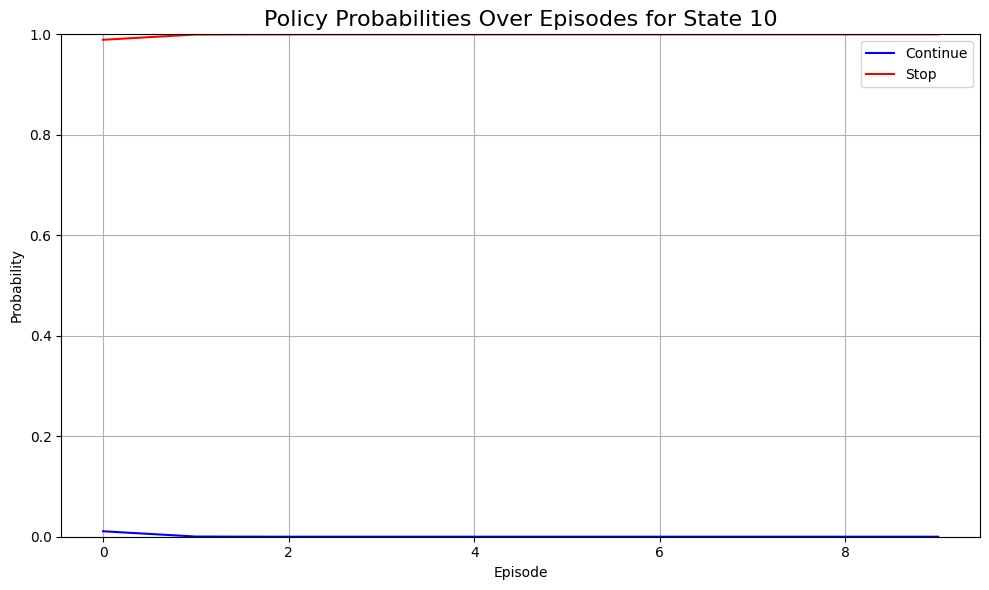

In [143]:
n = np.log(2)  # Constant Step size
K = 10  # Number of iterations

# Run the algorithm
final_policy, all_iter_policy = npg_algorithm(n, K)
deterministic_policy = np.argmax(final_policy, axis=1)

# Print the learned policy
print("\nFinal Policy (probability of stopping):", final_policy[:, 1])
print("Deterministic Policy:", deterministic_policy)

# Evaluate the learned policy
average_reward = evaluate_policy(deterministic_policy)
print(f"\nAverage Reward: {average_reward}")

for state in range(MAX_OFFER + 1):
    plt.figure(figsize=(10, 6))
    plt.plot(range(K), all_iter_policy[:, state, 0], label='Continue', color='blue')
    plt.plot(range(K), all_iter_policy[:, state, 1], label='Stop', color='red')
    
    plt.title(f'Policy Probabilities Over Episodes for State {state}', fontsize=16)
    plt.xlabel('Episode')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [141]:
# n = np.log(2)  # Constant Step size
# # n = 0.001
# # K = 1000  # Number of iterations

# # Run the algorithm
# final_policy = npg_algorithm(n, K)
# deterministic_policy = np.argmax(final_policy, axis=1)

# # Print the learned policy
# print("\nFinal Policy (probability of stopping):", final_policy[:, 1])
# print("Deterministic Policy:", deterministic_policy)

# # Evaluate the learned policy
# average_reward = evaluate_policy(deterministic_policy)
# print(f"\nAverage Reward: {average_reward}")

In [142]:
# delta = 0.1  # Assumed value for optimal advantage function gap
# gamma = 0.99

# # Calculate theoretical parameters
# C = (np.log(2) / n) + (1 / (1-gamma)**2)
# kappa = 2 * C / delta
# M = np.exp(kappa * n * delta / 2) / (1-gamma)**2

# print(f"Theoretical parameters:")
# print(f"C = {C}")
# print(f"k = {kappa}")
# print(f"M = {M}")

# final_policy = npg_algorithm(n, K)
# deterministic_policy = np.argmax(final_policy, axis=1)

# # Calculate the bound
# if K <= kappa:
#     bound = C / K
# else:
#     bound = M * np.exp(-K * n * delta / 2)

# print(f"\nTheoretical bound on V*(p) - V^π_K(p) ≤ {bound}")